In [1]:
import rnutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import SGD

rnutil: Los archivos de los conjuntos de datos que ofrece este paquete también están disponibles en https://github.com/facundoq/redes-neuronales-util/tree/main/rnutil/data para descargar de forma individual
rnutil: Agregando el parámetro local=True en las funciones rnutil.load_dataset_numpy, rnutil.load_dataset_pandas y rnutil.load_image se puede cargar una versión local de un archivo en lugar de la versión que ofrece este paquete.


## Carga del dataset

In [2]:
version_cruda = True

if version_cruda:
    df= rnutil.load_dataset_pandas("who_life_expectancy.csv")
    # quitar filas con valores faltantes
    print(df.columns)
    df = df.dropna()
    # quitar columna Country (es como un identificador)
    del df["Country"]
    # convertir columna status a valores numéricos de 0 a 2
    df["Status"] = df["Status"].astype("category").cat.codes
else:
    df = rnutil.load_dataset_pandas("who_life_expectancy_no_missing_numeric.csv")

    df.describe()
    
x = df.to_numpy()

Loading file from package rnutil (/home/adrian/.conda/envs/rn/lib/python3.10/site-packages/rnutil/data)...
Done
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


#  Convertir datos a numpy y entrenar modelo

Separar en columnas de entrada y de salida:

In [3]:
x, y  = np.hstack([x[:,0:2],x[:,3:]]),x[:,2:3]
d_out = y.shape[1]
d_in  = x.shape[1]
x     = (x- x.mean(axis=1,keepdims=True))/x.std(axis=1,keepdims=True)

Creación del modelo inicial:

In [4]:
print("Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados")

# Creo un modelo lineal
modelo = Sequential([Dense(d_out, input_shape=(d_in,), activation=None)])

Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados


2022-04-02 18:07:06.664422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 18:07:06.681774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 18:07:06.681877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-02 18:07:06.682226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Creo el optimizador y compilo el modelo para usarlo:

Epoch 1/15
52/52 [==============================] - 1s 805us/step - loss: 1330.8051 - mae: 30.7864
Epoch 2/15
52/52 [==============================] - 0s 773us/step - loss: 199.7039 - mae: 9.7821
Epoch 3/15
52/52 [==============================] - 0s 681us/step - loss: 172.4755 - mae: 8.7156
Epoch 4/15
52/52 [==============================] - 0s 692us/step - loss: 162.6701 - mae: 8.5431
Epoch 5/15
52/52 [==============================] - 0s 715us/step - loss: 154.1454 - mae: 8.4365
Epoch 6/15
52/52 [==============================] - 0s 704us/step - loss: 146.8162 - mae: 8.3218
Epoch 7/15
52/52 [==============================] - 0s 685us/step - loss: 140.1933 - mae: 8.2048
Epoch 8/15
52/52 [==============================] - 0s 714us/step - loss: 134.5717 - mae: 8.1408
Epoch 9/15
52/52 [==============================] - 0s 748us/step - loss: 129.5576 - mae: 8.0586
Epoch 10/15
52/52 [==============================] - 0s 704us/step - loss: 125.2273 - mae: 7.9719
Epoch 11/15
52/52 [========

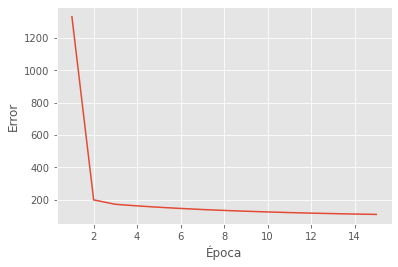

In [5]:
modelo.compile(
    # Algoritmo de optimización: Descenso de Gradiente Estocástico (Stochastic Gradient Descent)
    optimizer = SGD(learning_rate = 0.001),

    # Error cuadrático medio es la métrica de error a optimizar
    loss = 'mse', # IMPORTANTE

    # Metricas para ir calculando en cada iteracion o batch (usamos MAE también)
    metrics = ['mae']
)

# Entrenamiento del modelo
history  = modelo.fit(
    x,
    y,
    epochs     = 15,
    batch_size = 32
)

# Visualización
rnutil.plot_loss(history.history["loss"])

# Visualización de los coeficientes resultantes de la regresión lineal

El siguiente gráfico de barras muestra la magnitud (y signo) de los coeficientes `w` de la regresión lineal, además del sesgo. De esta forma se puede intentar explicar la importancia de cada uno de los atributos para el modelo.

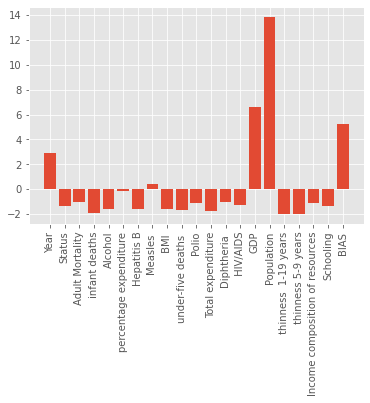

In [6]:
w, b = modelo.get_weights()

# agrego el bias y w a un vector de parámetros
parameters = np.hstack( [w.squeeze(),b])
indices = range(len(parameters))

# dibujo un gráfico de barra de los parámetros (coeficientes de cada atributo)
plt.figure()
plt.bar(indices,parameters)

# agrego el bias a la lista de nombres de columnas
columns = list(df.columns) + ["BIAS"]

# quito la esperanza de vida de esta lista (es la var a predecir)
del columns [2]
plt.xticks(indices,columns,rotation="vertical")
plt.show()